In [1]:
#Importing the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


Loading the Dataset


We download the dataset directly from the UCI Machine Learning Repository and load it into a pandas DataFrame. The dataset is in .csv format.

In [5]:
data = pd.read_csv(r"C:\Users\varun\Desktop\PRODIGY\Prodigy T4\bank.csv",sep=';')

# Display the first few rows of the dataset
print(data.head())


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


# Data Preprossing for Modeling

Dropping the duration Column

The duration column is removed because, according to the dataset description, it should not be used in a realistic predictive model due to its direct influence on the target variable.

In [6]:
# Drop the 'duration' column, as it should not be used for realistic predictions
data = data.drop(columns=['duration'])


Handling Missing Values

We replace any occurrences of 'unknown' in categorical columns with NaN and then drop rows that contain missing values in the key columns (job, marital, education, contact, poutcome).

In [7]:
# Replace 'unknown' values with NaN to handle missing values
data.replace('unknown', pd.NA, inplace=True)

# Drop rows with missing values in essential columns
data = data.dropna(subset=['job', 'marital', 'education', 'contact', 'poutcome'])


Encoding Categorical Variables

We use LabelEncoder to convert categorical columns into numeric form, as machine learning algorithms like decision trees work best with numerical data.

In [8]:
# Encode categorical variables into numerical values using LabelEncoder
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])


In [9]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['y'])  # Features (independent variables)
y = data['y']  # Target (dependent variable)


Splitting the Data into Training and Testing Sets


We split the dataset into training (70%) and testing (30%) sets using train_test_split. This ensures that we have a separate test set to evaluate the model’s performance.

In [10]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Building the Decision Tree Classifier

In [11]:
# Initialize the decision tree classifier and train it on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
# Use the trained model to make predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [13]:
# Evaluate the model's accuracy and print a classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 70.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       167
           1       0.47      0.43      0.45        63

    accuracy                           0.71       230
   macro avg       0.63      0.62      0.62       230
weighted avg       0.70      0.71      0.70       230



Model Performance Analysis

Overall Accuracy:

The model achieved an accuracy of 70.87%. This indicates that approximately 71% of the predictions made by the decision tree classifier were correct. While this is a reasonable accuracy, it also suggests there is room for improvement.

Precision and Recall:

Class 0 (No Subscription):

Precision: 0.79 (79%)

This means that when the model predicts a customer will not subscribe to the term deposit, it is correct 79% of the time. This indicates a good ability to identify non-subscribers.

Recall: 0.81 (81%)

This indicates that out of all actual non-subscribers, the model correctly identifies 81%. High recall here shows the model is effective at detecting non-subscribers.

Class 1 (Subscription):

Precision: 0.47 (47%)

This is relatively low, suggesting that when the model predicts a customer will subscribe, it is only correct about 47% of the time. This indicates that many of the predictions for subscribers are false positives.

Recall: 0.43 (43%)

This means that out of all actual subscribers, the model only identifies 43%. This low recall indicates the model struggles to recognize customers who are likely to subscribe.

F1 Score:

The F1 score for Class 0 is 0.80, indicating a good balance between precision and recall. However, the F1 score for Class 1 is 0.45, which suggests that the model's performance in identifying subscribers is subpar.

Macro and Weighted Averages:

The macro average values for precision (0.63), recall (0.62), and F1-score (0.62) indicate that the model performs fairly similarly across both classes but is generally lower for the subscription class.
The weighted average values (0.70 for precision, 0.71 for recall, and 0.70 for F1-score) show that the overall performance of the model is somewhat better when taking class distribution into account, reflecting a stronger performance on the more frequent class (non-subscribers).

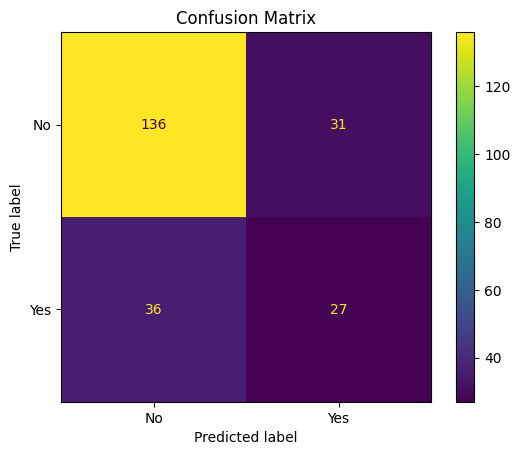

In [18]:
# Visualization of Confusion Matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.show()

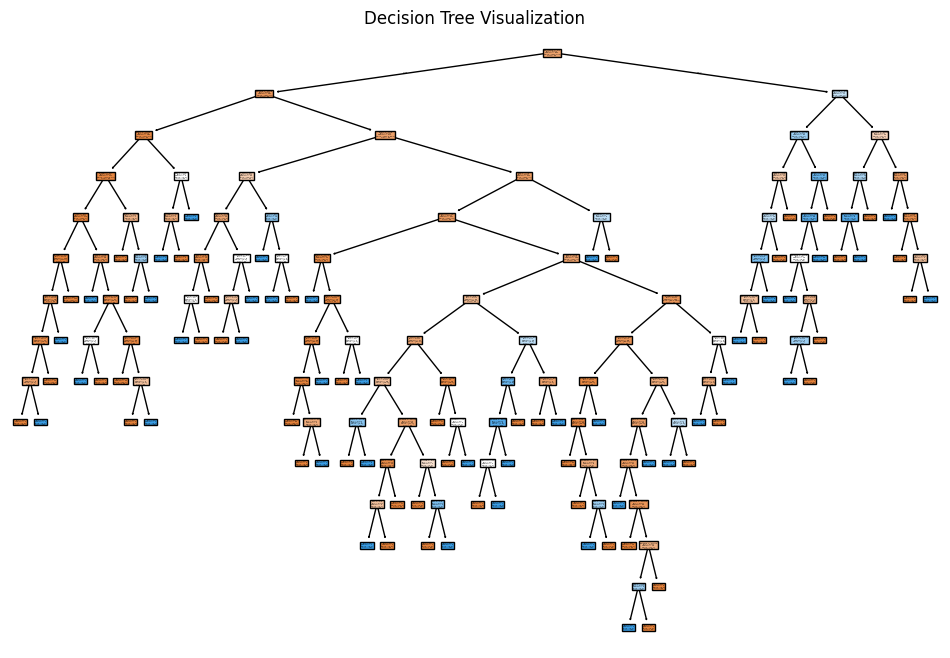

In [16]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True)

# Show the plot
plt.title("Decision Tree Visualization")
plt.show()



Point-based analysis of the Decision Tree plot based on the classification results:

Tree Depth: The decision tree seems to have multiple layers, indicating it is a deep tree. This level of depth can capture complex relationships in the dataset but might also risk overfitting.


Splits: Each internal node represents a decision rule based on a feature split (thresholds). The top-level splits likely involve the most important features with the highest information gain.


Leaf Nodes: The leaves at the bottom of the tree represent the final predictions made by the model, categorized into different classes. In this case, the final decision appears to predict between two classes (likely "No" and "Yes" as shown in the confusion matrix).


Class Distribution: The color-coding suggests which class each leaf node is assigned to. A dominant majority of predictions belong to one class (orange for "No") compared to another (blue for "Yes").


Prediction Imbalance: Judging by the confusion matrix and classification report, the model seems to struggle with predicting the minority class (1/Yes), which could be attributed to class imbalance or insufficient feature splits in certain branches of the tree for this class.


Accuracy vs. Recall: While the model has a reasonable accuracy (~70.87%), its recall for class "Yes" is relatively low (~43%). This may indicate the tree is biased toward predicting the "No" class more effectively.

# Conclusion

Overall, while the decision tree model demonstrates reasonable performance in predicting non-subscribers, These points indicate that while the tree performs well for the majority class, it underperforms in predicting the minority class, which might require techniques like pruning, handling class imbalance, or trying different algorithms.